## Data Cleaning

### Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read and explore Data.csv

In [2]:
df = pd.read_csv("../data/Data.csv")
df.head()

,Date,Target_Name,Target_Industry_Macro,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,Target_EV,Target_Industry_Detailed,Target_Status,Year,EV_Rev,EV_EBITDA
0,14/08/2024,Sarsys-Asft AB,Industrials,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,2.88,"Measuring, Medical, Photo Equipment; Clocks",Public,"2,024.00",0.77,-12.55
1,08/08/2024,GSE Systems Inc,High Technology,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,13.17,Prepackaged Software,Public,"2,024.00",0.32,-12.91
2,06/08/2024,INEO Tech Corp,Consumer Products and Services,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,3.91,Business Services,Public,"2,024.00",3.97,-2.19
3,03/08/2024,Big Cheese Studio SA,High Technology,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,11.29,Prepackaged Software,Public,"2,024.00",4.16,10.72
4,01/08/2024,Braille Energy Systems Inc,Energy and Power,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,5.86,Electronic and Electrical Equipment,Public,"2,024.00",2.41,-4.33


In [3]:
df.dtypes

Date                         object
Target_Name                  object
Target_Industry_Macro        object
Target_Industry_Mid          object
Target_Nation                object
Buyer_Name                   object
Buyer_Industry_Macro         object
Buyer_Industry_Mid           object
Buyer_Nation                 object
Target_Revenues              object
Target_EBITDA                object
Target_EV                    object
Target_Industry_Detailed     object
Target_Status                object
Year                         object
EV_Rev                      float64
EV_EBITDA                   float64
dtype: object

### Need to change some objects into floats and ints

In [4]:
df['Target_Revenues']=df['Target_Revenues'].str.replace(',','')
df['Target_Revenues'] = df.Target_Revenues.astype(float)

df['Target_EBITDA']=df['Target_EBITDA'].str.replace(',','')
df['Target_EBITDA']=df.Target_EBITDA.astype(float)

df['Target_EV']=df['Target_EV'].str.replace(',','')
df['Target_EV']=df.Target_EV.astype(float)

df['Year']=df['Year'].str.replace(',','')
df['Year']=df.Year.astype(float)
df['Year']=df.Year.astype(int)

df.head()

,Date,Target_Name,Target_Industry_Macro,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,Target_EV,Target_Industry_Detailed,Target_Status,Year,EV_Rev,EV_EBITDA
0,14/08/2024,Sarsys-Asft AB,Industrials,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,2.88,"Measuring, Medical, Photo Equipment; Clocks",Public,2024,0.77,-12.55
1,08/08/2024,GSE Systems Inc,High Technology,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,13.17,Prepackaged Software,Public,2024,0.32,-12.91
2,06/08/2024,INEO Tech Corp,Consumer Products and Services,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,3.91,Business Services,Public,2024,3.97,-2.19
3,03/08/2024,Big Cheese Studio SA,High Technology,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,11.29,Prepackaged Software,Public,2024,4.16,10.72
4,01/08/2024,Braille Energy Systems Inc,Energy and Power,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,5.86,Electronic and Electrical Equipment,Public,2024,2.41,-4.33


### Change 'Date' from 'object' to 'datetime'

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date']

0       2024-08-14
1       2024-08-08
2       2024-08-06
3       2024-08-03
4       2024-08-01
           ...    
14770   2014-01-14
14771   2014-01-13
14772   2014-01-13
14773   2014-01-03
14774   2014-01-01
Name: Date, Length: 14775, dtype: datetime64[ns]

In [6]:
df.dtypes

Date                        datetime64[ns]
Target_Name                         object
Target_Industry_Macro               object
Target_Industry_Mid                 object
Target_Nation                       object
Buyer_Name                          object
Buyer_Industry_Macro                object
Buyer_Industry_Mid                  object
Buyer_Nation                        object
Target_Revenues                    float64
Target_EBITDA                      float64
Target_EV                          float64
Target_Industry_Detailed            object
Target_Status                       object
Year                                 int64
EV_Rev                             float64
EV_EBITDA                          float64
dtype: object

### Check counts of target_industry_macro

In [7]:
target_macro_df = df['Target_Industry_Macro'].value_counts().reset_index()
target_macro_df.columns = ['Target_Industry_Macro', 'Count']
target_macro_df

,Target_Industry_Macro,Count
0,High Technology,2372
1,Financials,2226
2,Industrials,1785
3,Energy and Power,1366
4,Healthcare,1339
5,Materials,1257
6,Consumer Products and Services,1015
7,Media and Entertainment,818
8,Real Estate,794
9,Consumer Staples,783


#### Remove 'Government and Agencies' rows

In [8]:
df = df[df['Target_Industry_Macro'] != 'Government and Agencies']
df.shape

(14768, 17)

### Remove outliers

In [9]:
# Skip for now

#Keep EV_Rev < 100
#df = df[df['EV_Rev'] < 20] # was 100
#Keep EV_EBITDA >-100 and <500
#df = df[df['EV_EBITDA'] > 0] # was -100
#df = df[df['EV_EBITDA'] < 50] # was 500
#df.shape

### Remove  nulls

In [10]:
df = df.dropna()

nan_count=df.isnull().sum()
print(nan_count)
print('')
print('New shape:', df.shape)

Date                        0
Target_Name                 0
Target_Industry_Macro       0
Target_Industry_Mid         0
Target_Nation               0
Buyer_Name                  0
Buyer_Industry_Macro        0
Buyer_Industry_Mid          0
Buyer_Nation                0
Target_Revenues             0
Target_EBITDA               0
Target_EV                   0
Target_Industry_Detailed    0
Target_Status               0
Year                        0
EV_Rev                      0
EV_EBITDA                   0
dtype: int64

New shape: (14766, 17)


### One hot encoding

In [11]:
country_to_region = {
    'United States': 'North America',
    'Canada': 'North America',
    'Greenland': 'North America',
    'France': 'Western Europe',
    'Germany': 'Western Europe',
    'Netherlands': 'Western Europe',
    'Belgium': 'Western Europe',
    'Luxembourg': 'Western Europe',
    'Switzerland': 'Western Europe',
    'Austria': 'Western Europe',
    'Liechtenstein': 'Western Europe',
    'Monaco': 'Western Europe',
    'United Kingdom': 'UK',
    'Jersey': 'UK',
    'Guernsey': 'UK',
    'Isle of Man': 'UK',
    'Ireland': 'UK',
    'Sweden': 'Nordics',
    'Norway': 'Nordics',
    'Denmark': 'Nordics',
    'Finland': 'Nordics',
    'Iceland': 'Nordics',
    'Poland': 'Eastern Europe',
    'Bosnia and Herzegovina': 'Eastern Europe',
    'Lithuania': 'Eastern Europe',
    'Bulgaria': 'Eastern Europe',
    'Russia': 'Eastern Europe',
    'Estonia': 'Eastern Europe',
    'Latvia': 'Eastern Europe',
    'Hungary': 'Eastern Europe',
    'Romania': 'Eastern Europe',
    'Ukraine': 'Eastern Europe',
    'Moldova': 'Eastern Europe',
    'Serbia': 'Eastern Europe',
    'Slovenia': 'Eastern Europe',
    'North Macedonia': 'Eastern Europe',
    'Montenegro': 'Eastern Europe',
    'Slovakia': 'Eastern Europe',
    'Czech Republic': 'Eastern Europe',
    'Portugal': 'Southern Europe',
    'Italy': 'Southern Europe',
    'Spain': 'Southern Europe',
    'Greece': 'Southern Europe',
    'Croatia': 'Southern Europe',
    'Cyprus': 'Southern Europe',
    'Malta': 'Southern Europe',
    'Gibraltar': 'Southern Europe',
    'Turkey': 'Southern Europe'
}

# Apply the updated mapping to create a new column
df['Target_Region'] = df['Target_Nation'].map(country_to_region)

# One-hot encode the columns
df = pd.get_dummies(df, columns=['Target_Region'])
df = pd.get_dummies(df, columns=['Target_Industry_Macro'])
df = pd.get_dummies(df, columns=['Target_Status'])

In [12]:
df = df.drop(columns=['Target_Status_Private'])
# Display the updated dataframe
df

,Date,Target_Name,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,...,Target_Industry_Macro_Financials,Target_Industry_Macro_Healthcare,Target_Industry_Macro_High Technology,Target_Industry_Macro_Industrials,Target_Industry_Macro_Materials,Target_Industry_Macro_Media and Entertainment,Target_Industry_Macro_Real Estate,Target_Industry_Macro_Retail,Target_Industry_Macro_Telecommunications,Target_Status_Public
0,2024-08-14,Sarsys-Asft AB,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,...,0,0,0,1,0,0,0,0,0,1
1,2024-08-08,GSE Systems Inc,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,...,0,0,1,0,0,0,0,0,0,1
2,2024-08-06,INEO Tech Corp,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,...,0,0,0,0,0,0,0,0,0,1
3,2024-08-03,Big Cheese Studio SA,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,...,0,0,1,0,0,0,0,0,0,1
4,2024-08-01,Braille Energy Systems Inc,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14770,2014-01-14,Delphi Automotive PLC,Automobiles & Components,United Kingdom,Delphi Automotive PLC,Industrials,Automobiles & Components,United Kingdom,11984.02,1724.48,...,0,0,0,1,0,0,0,0,0,1
14771,2014-01-13,Time Warner Cable Inc,Cable,United States,Charter Communications Inc,Telecommunications,Telecommunications Services,United States,16093.18,5805.77,...,0,0,0,0,0,1,0,0,0,1
14772,2014-01-13,Beam Inc,Food and Beverage,United States,Suntory Holdings Ltd,Consumer Staples,Food and Beverage,Japan,1849.33,575.99,...,0,0,0,0,0,0,0,0,0,1
14773,2014-01-03,Sirius XM Holdings Inc,Broadcasting,United States,Liberty Media Corp,Media and Entertainment,Broadcasting,United States,2763.99,946.36,...,0,0,0,0,0,1,0,0,0,1


### Check for nulls

In [13]:
nan_count=df.isnull().sum()
nan_count

Date                                                    0
Target_Name                                             0
Target_Industry_Mid                                     0
Target_Nation                                           0
Buyer_Name                                              0
Buyer_Industry_Macro                                    0
Buyer_Industry_Mid                                      0
Buyer_Nation                                            0
Target_Revenues                                         0
Target_EBITDA                                           0
Target_EV                                               0
Target_Industry_Detailed                                0
Year                                                    0
EV_Rev                                                  0
EV_EBITDA                                               0
Target_Region_Eastern Europe                            0
Target_Region_Nordics                                   0
Target_Region_

In [14]:
# Full df shape
df.shape

(14766, 34)

### Split df into 3

In [15]:
# Split 1: EBITDA >= 1
split1 = df[df['Target_EBITDA'] >= 1]
split1.shape

(10223, 34)

In [22]:
# Split 2: EBITDA <1 and >-1
split2 = df[df['Target_EBITDA'].between(-1, 1)]
split2.shape

(1992, 34)

In [18]:
# Split 3:
split3 = df[df['Target_EBITDA'] <= -1]
split3.shape

(2574, 34)

In [23]:
split1.describe()

,Target_Revenues,Target_EBITDA,Target_EV,Year,EV_Rev,EV_EBITDA,Target_Region_Eastern Europe,Target_Region_Nordics,Target_Region_North America,Target_Region_Southern Europe,...,Target_Industry_Macro_Financials,Target_Industry_Macro_Healthcare,Target_Industry_Macro_High Technology,Target_Industry_Macro_Industrials,Target_Industry_Macro_Materials,Target_Industry_Macro_Media and Entertainment,Target_Industry_Macro_Real Estate,Target_Industry_Macro_Retail,Target_Industry_Macro_Telecommunications,Target_Status_Public
count,10223.000000,10223.000000,1.022300e+04,10223.000000,10223.000000,10223.000000,10223.000000,10223.000000,10223.000000,10223.000000,...,10223.000000,10223.000000,10223.000000,10223.000000,10223.000000,10223.000000,10223.000000,10223.000000,10223.000000,10223.000000
mean,2930.750193,599.425316,7.504062e+03,2018.531938,6.029663,27.253637,0.086080,0.081874,0.461802,0.133816,...,0.173530,0.053800,0.132642,0.133522,0.086276,0.059963,0.062408,0.046073,0.026607,0.898562
std,14138.848262,3643.291905,5.829905e+04,3.066333,111.322590,440.037606,0.280496,0.274186,0.498563,0.340471,...,0.378724,0.225634,0.339204,0.340155,0.280785,0.237430,0.241907,0.209653,0.160939,0.301923
min,0.110000,1.000000,2.100000e-01,2014.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.345000,8.875000,1.025400e+02,2016.000000,0.880000,6.580000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,239.440000,43.720000,5.052500e+02,2018.000000,1.980000,10.690000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1129.115000,213.160000,2.571625e+03,2021.000000,4.670000,18.105000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,406942.550000,134717.010000,2.540543e+06,2024.000000,10442.110000,33655.510000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Graphs

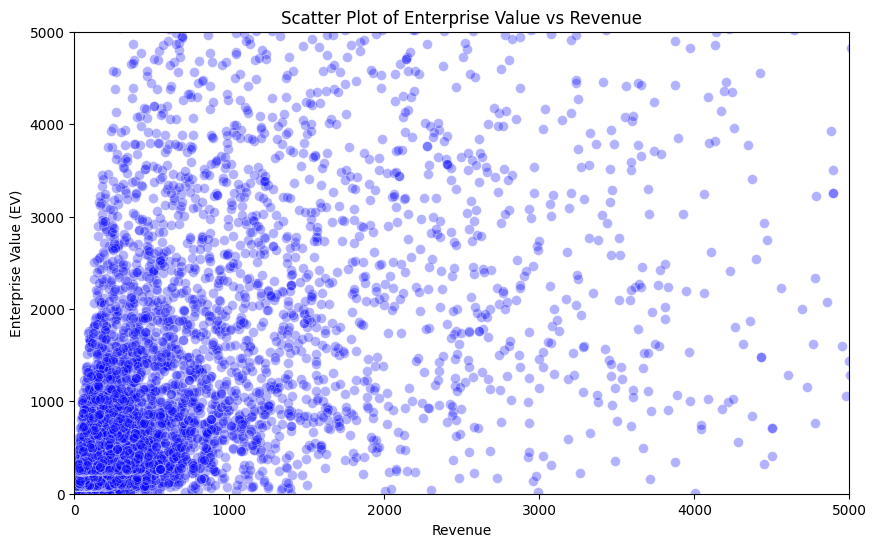

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['Target_Revenues'], y=df['Target_EV'], alpha=0.3, color='blue', s=50)

plt.xlabel('Revenue')
plt.ylabel('Enterprise Value (EV)')
plt.title('Scatter Plot of Enterprise Value vs Revenue')

plt.xlim(0, 5000)  # Example x-axis limits
plt.ylim(0, 5000)  # Example y-axis limits

plt.show()

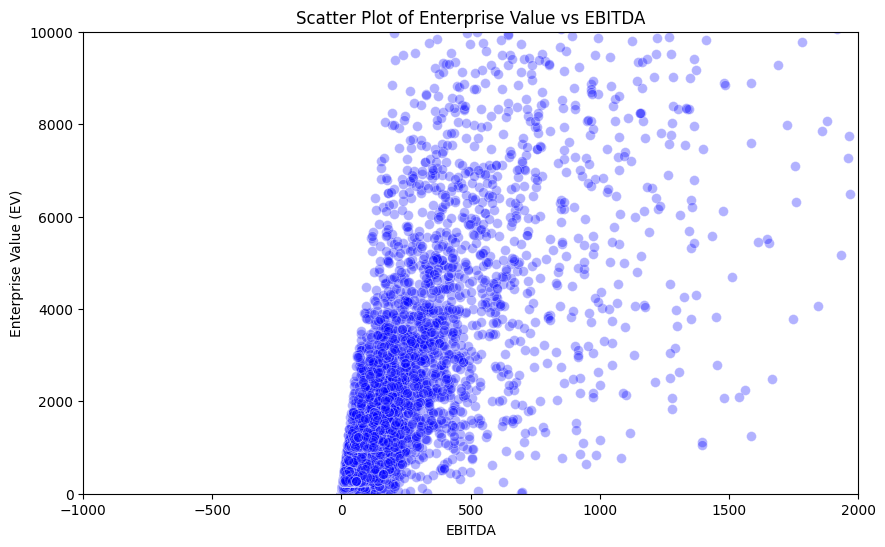

In [23]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['Target_EBITDA'], y=df['Target_EV'], alpha=0.3, color='blue', s=50)

plt.xlabel('EBITDA')
plt.ylabel('Enterprise Value (EV)')
plt.title('Scatter Plot of Enterprise Value vs EBITDA')

plt.xlim(-1000, 2000)  # Example x-axis limits
plt.ylim(0, 10000)  # Example y-axis limits

plt.show()

In [24]:
df.head()

,Date,Target_Name,Target_Industry_Macro,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,Target_EV,Target_Industry_Detailed,Target_Status,Year,EV_Rev,EV_EBITDA,Target_Region
3,2024-08-03,Big Cheese Studio SA,High Technology,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,11.29,Prepackaged Software,Public,2024,4.16,10.72,Eastern Europe
6,2024-07-31,Lusa Agencia De Noticias De Portugal Sa,Media and Entertainment,Publishing,Portugal,Republic of Portugal,Government and Agencies,National Government,Portugal,17.20,0.84,5.16,Business Services,Private,2024,0.30,6.18,Southern Europe
9,2024-07-17,Jelsingrad Livar Livnica Celika Ad Banja Luka,Materials,Metals & Mining,Bosnia and Herzegovina,Bll Steel Doo,Materials,Metals & Mining,Bosnia and Herzegovina,5.44,0.44,0.11,Metal and Metal Products,Public,2024,0.02,0.26,Eastern Europe
11,2024-07-12,Stil Termica Termo Idraulica Laziale Srl,Industrials,Building/Construction & Engineering,Italy,Renovalo SpA,Industrials,Building/Construction & Engineering,Italy,1.16,0.39,0.11,Construction Firms,Private,2024,0.09,0.28,Southern Europe
12,2024-07-11,Resscapital AB,Financials,Other Financials,Sweden,Mangold AB,Financials,Brokerage,Sweden,8.33,5.76,10.32,Investment & Commodity Firms/Dealers/Exchanges,Private,2024,1.24,1.79,Nordics


In [25]:
df.dtypes

Date                        datetime64[ns]
Target_Name                         object
Target_Industry_Macro               object
Target_Industry_Mid                 object
Target_Nation                       object
Buyer_Name                          object
Buyer_Industry_Macro                object
Buyer_Industry_Mid                  object
Buyer_Nation                        object
Target_Revenues                    float64
Target_EBITDA                      float64
Target_EV                          float64
Target_Industry_Detailed            object
Target_Status                       object
Year                                 int64
EV_Rev                             float64
EV_EBITDA                          float64
Target_Region                       object
dtype: object

In [26]:
#Check for nulls
nan_count=df.isnull().sum()
nan_count

Date                        0
Target_Name                 0
Target_Industry_Macro       0
Target_Industry_Mid         0
Target_Nation               0
Buyer_Name                  0
Buyer_Industry_Macro        0
Buyer_Industry_Mid          0
Buyer_Nation                0
Target_Revenues             0
Target_EBITDA               0
Target_EV                   0
Target_Industry_Detailed    0
Target_Status               0
Year                        0
EV_Rev                      0
EV_EBITDA                   0
Target_Region               0
dtype: int64

### Planning the Features

- Target_Revenues (float64)
- Target_EBITDA (float64)
- Target_Industry (13 encoded)
- Target_Region (6 encoded)
- Target_Status (Prviate = 0, Public = 1)
- Date: *leave out for now*

### Cross-correlation matrix

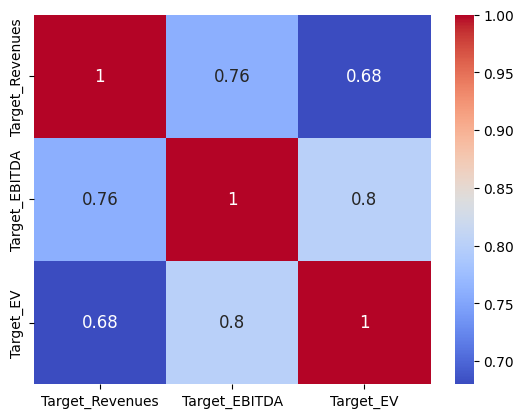

In [27]:
plt.figure
sns.heatmap(round(df[['Target_Revenues', 'Target_EBITDA', 'Target_EV']].corr(),2),
            cmap='coolwarm',
            annot = True,
            annot_kws = {'size':12}
           );

### Dumb Model
- y-pred = average of y values
- RMSE as evaluation metric 

### First Regression

**We need 'statsmodels' as a requirement!**

In [28]:
pip install statsmodels


[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
import statsmodels.formula.api as smf

In [30]:
X1 = df['Target_Revenues']
X2 = df['Target_EBITDA']
y = df['Target_EV']

In [31]:
model = smf.ols(formula = 'Target_EV ~ Target_Revenues + Target_EBITDA', data=df)
model = model.fit()

In [32]:
model.params

Intercept         -770.879964
Target_Revenues      0.551393
Target_EBITDA        8.791475
dtype: float64

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Target_EV   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     9832.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:46:47   Log-Likelihood:            -1.2041e+05
No. Observations:               10341   AIC:                         2.408e+05
Df Residuals:                   10338   BIC:                         2.408e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -770.8800    276.654     -2.786      0.005   -1313.176    -228.584
Target_Revenues     0.5514      0.030     18.433      0.000       0.493       0.610
Target_EBITDA       8.7915      0.115     76.156      0.000       8.565       9.018
==============================================================================
Omnibus:                    20029.652   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        806355541.317
Skew:                          13.972   Prob(JB):                         0.00
Kurtosis:                    1370.719   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
from statsmodels.tools.eval_measures import rmse

In [35]:
rmse(X1,X2, axis=0)

11677.67402505005

rmse(X1, X2, axis=0)

#### Adding more features to the regression

In [36]:
# Add public_private
model2 = smf.ols(formula = 'Target_EV ~ Target_Revenues + Target_EBITDA + C(Target_Status)', data=df)
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Target_EV   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     6555.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:46:47   Log-Likelihood:            -1.2041e+05
No. Observations:               10341   AIC:                         2.408e+05
Df Residuals:                   10337   BIC:                         2.408e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -26.3223    730.016     -0.036      0.971   -1457.296    1404.651
C(Target_Status)[T.Public]  -869.1643    788.625     -1.102      0.270   -2415.022     676.694
Target_Revenues                0.5529      0.030     18.465      0.000       0.494       0.612
Target_EBITDA                  8.7920      0.115     76.161      0.000       8.566       9.018
==============================================================================
Omnibus:                    20016.429   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        805033555.811
Skew:                          13.950   Prob(JB):                         0.00
Kurtosis:                    1369.598   Cond. No.                     5.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
model2.params

Intercept                     -26.322335
C(Target_Status)[T.Public]   -869.164281
Target_Revenues                 0.552949
Target_EBITDA                   8.791967
dtype: float64

In [38]:
# Add Industry
model3 = smf.ols(formula = 'Target_EV ~ Target_Revenues + Target_EBITDA + C(Target_Industry_Macro)', data=df)
model3 = model3.fit()
print(model3.params)

Intercept                                             -2806.412384
C(Target_Industry_Macro)[T.Consumer Staples]           2021.811845
C(Target_Industry_Macro)[T.Energy and Power]          -1000.143827
C(Target_Industry_Macro)[T.Financials]                 4372.913007
C(Target_Industry_Macro)[T.Healthcare]                 3078.228798
C(Target_Industry_Macro)[T.High Technology]            4416.529143
C(Target_Industry_Macro)[T.Industrials]                1504.175006
C(Target_Industry_Macro)[T.Materials]                  -102.982772
C(Target_Industry_Macro)[T.Media and Entertainment]    2506.321755
C(Target_Industry_Macro)[T.Real Estate]                3770.228514
C(Target_Industry_Macro)[T.Retail]                      363.168195
C(Target_Industry_Macro)[T.Telecommunications]        -1852.163441
Target_Revenues                                           0.562342
Target_EBITDA                                             8.764094
dtype: float64


In [39]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Target_EV   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1524.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:47:59   Log-Likelihood:            -1.2038e+05
No. Observations:               10341   AIC:                         2.408e+05
Df Residuals:                   10327   BIC:                         2.409e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                           -2806.4124    971.057     -2.890      0.004   -4709.873    -902.952
C(Target_Industry_Macro)[T.Consumer Staples]         2021.8118   1505.980      1.343      0.179    -930.201    4973.825
C(Target_Industry_Macro)[T.Energy and Power]        -1000.1438   1294.500     -0.773      0.440   -3537.615    1537.328
C(Target_Industry_Macro)[T.Financials]               4372.9130   1177.488      3.714      0.000    2064.808    6681.018
C(Target_Industry_Macro)[T.Healthcare]               3078.2288   1534.360      2.006      0.045      70.586    6085.871
C(Target_Industry_Macro)[T.High Technology]          4416.5291   1211.017      3.647      0.000    2042.701    6790.357
C(Target_Industry_Macro)[T.Industrials]              1504.1750   1210.075      1.243      0.214    -867.806    3876.156
C(Target_Industry_Macro)[T.Materials]                -102.9828   1331.762     -0.077      0.938   -2713.494    2507.529
C(Target_Industry_Macro)[T.Media and Entertainment]  2506.3218   1454.841      1.723      0.085    -345.448    5358.092
C(Target_Industry_Macro)[T.Real Estate]              3770.2285   1543.211      2.443      0.015     745.235    6795.222
C(Target_Industry_Macro)[T.Retail]                    363.1682   1606.714      0.226      0.821   -2786.303    3512.639
C(Target_Industry_Macro)[T.Telecommunications]      -1852.1634   1916.011     -0.967      0.334   -5607.917    1903.590
Target_Revenues                                         0.5623      0.030     18.751      0.000       0.504       0.621
Target_EBITDA                                           8.7641      0.116     75.756      0.000       8.537       8.991
==============================================================================
Omnibus:                    20050.899   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        805782811.268
Skew:                          14.009   Prob(JB):                         0.00
Kurtosis:                    1370.232   Cond. No.                     1.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Notes
- log transform Y
- bring log back when explaining np.exp()

#### Distribution of Y

In [72]:
df['Target_EV'].describe()

count    1.034100e+04
mean     5.899579e+03
std      4.697468e+04
min      1.100000e-01
25%      5.717000e+01
50%      3.550200e+02
75%      2.103810e+03
max      2.540543e+06
Name: Target_EV, dtype: float64

In [73]:
df['Target_EV'].nlargest(5)

13128    2540542.97
13404    2536581.04
13750    1152770.86
14101     795277.22
14289     726066.36
Name: Target_EV, dtype: float64

<AxesSubplot:>

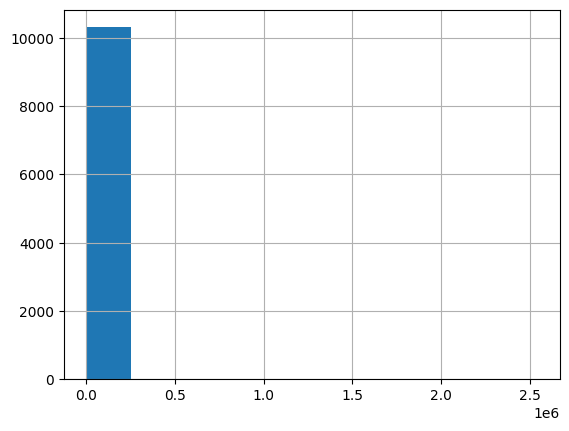

In [74]:
df['Target_EV'].hist()

#### Log Transformation of Y

In [75]:
df['log_Target_EV'] = df['Target_EV'].apply(lambda x: np.log(x))

In [76]:
df['log_Target_EV'].describe()

count    10341.000000
mean         5.824865
std          2.538597
min         -2.207275
25%          4.046029
50%          5.872174
75%          7.651505
max         14.747888
Name: log_Target_EV, dtype: float64

<AxesSubplot:>

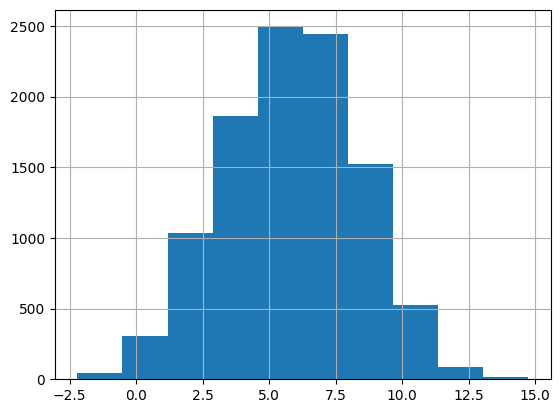

In [77]:
df['log_Target_EV'].hist()

#### Simplest regression model using Log-Y

In [58]:
logmodel = smf.ols(formula = 'log_Target_EV ~ Target_EBITDA + Target_Revenues', data=df)
logmodel = logmodel.fit()
print(logmodel.params)

Intercept          5.242030
Target_EBITDA      0.000067
Target_Revenues    0.000057
dtype: float64


In [59]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_Target_EV   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     876.7
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:42:59   Log-Likelihood:                -34252.
No. Observations:               14766   AIC:                         6.851e+04
Df Residuals:                   14763   BIC:                         6.853e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.2420      0.021    254.928      0.000       5.202       5.282
Target_EBITDA    6.685e-05   9.92e-06      6.742      0.000    4.74e-05    8.63e-05
Target_Revenues  5.702e-05   2.51e-06     22.702      0.000    5.21e-05    6.19e-05
==============================================================================
Omnibus:                      160.192   Durbin-Watson:                   0.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.812
Skew:                          -0.238   Prob(JB):                     2.20e-37
Kurtosis:                       3.217   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
np.corrcoef(np.exp(logmodel.fittedvalues),np.exp(df.log_Target_EV))**2

array([[1.        , 0.02646567],
       [0.02646567, 1.        ]])

#### Simplest model using Y (not log)

In [61]:
model = smf.ols(formula = 'Target_EV ~ Target_EBITDA + Target_Revenues', data=df)
model = model.fit()
print(model.params)

Intercept          1505.481261
Target_EBITDA         8.572188
Target_Revenues       0.652297
dtype: float64


In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Target_EV   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     502.3
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          8.85e-212
Time:                        12:44:04   Log-Likelihood:            -1.9414e+05
No. Observations:               14766   AIC:                         3.883e+05
Df Residuals:                   14763   BIC:                         3.883e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1505.4813   1036.851      1.452      0.147    -526.876    3537.838
Target_EBITDA       8.5722      0.500     17.143      0.000       7.592       9.552
Target_Revenues     0.6523      0.127      5.150      0.000       0.404       0.901
==============================================================================
Omnibus:                    59967.228   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      94033773206.610
Skew:                         106.979   Prob(JB):                         0.00
Kurtosis:                   12363.928   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Rerun log-model with removing outliers

In [64]:
#Keep EV_Rev < 100
df = df[df['EV_Rev'] < 20] # was 100
#Keep EV_EBITDA >-100 and <500
df = df[df['EV_EBITDA'] > 0] # was -100
df = df[df['EV_EBITDA'] < 50] # was 500
df.shape

(10341, 35)

- 14776 - 10341 = 4435 removed

In [65]:
logmodel = smf.ols(formula = 'log_Target_EV ~ Target_EBITDA + Target_Revenues', data=df)
logmodel = logmodel.fit()
print(logmodel.params)

Intercept          5.644237
Target_EBITDA      0.000067
Target_Revenues    0.000050
dtype: float64


In [66]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_Target_EV   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     745.6
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          3.18e-303
Time:                        12:45:44   Log-Likelihood:                -23610.
No. Observations:               10341   AIC:                         4.723e+04
Df Residuals:                   10338   BIC:                         4.725e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.6442      0.024    237.050      0.000       5.598       5.691
Target_EBITDA     6.73e-05   9.94e-06      6.773      0.000    4.78e-05    8.68e-05
Target_Revenues  5.023e-05   2.57e-06     19.510      0.000    4.52e-05    5.53e-05
==============================================================================
Omnibus:                      382.406   Durbin-Watson:                   0.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.904
Skew:                          -0.467   Prob(JB):                     1.63e-94
Kurtosis:                       3.362   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
np.corrcoef(np.exp(logmodel.fittedvalues),np.exp(df.log_Target_EV))**2

array([[1.        , 0.28216323],
       [0.28216323, 1.        ]])